### Import packages

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,3) # make figures larger

* Read csv

In [2]:
data = "/home/etiuzale-clinton/Documents/Books/Data Science Workshops-20250306T203931Z-001/Data Science Workshops/Data Science Workshops/R programming files/Philadelphia Crime Rates/2_workshop_data_2.csv"



In [3]:
df = pd.read_csv(data, parse_dates=True)
df

,Dc_Dist,Dispatch_Date_Time,Text_General_Code
0,25,2013-05-28 22:18:00,Vandalism/Criminal Mischief
1,16,2006-12-10 19:42:00,Other Assaults
2,35,2013-10-24 22:06:00,Narcotic / Drug Law Violations
3,4,2007-05-14 18:33:00,Theft from Vehicle
4,35,2012-09-24 20:55:00,Aggravated Assault No Firearm
...,...,...,...
209995,16,2009-04-17 19:44:00,Fraud
209996,39,2007-03-04 11:10:00,Aggravated Assault No Firearm
209997,15,2006-02-03 09:17:00,All Other Offenses
209998,25,2012-06-05 17:44:00,Other Assaults


### - Dictionary
  - DC_Dist = Number of District Police
  - Dispatch_Date_Time = Date and Time of response
  - Text_General_Code = Type of Crimes


- Extract date and time into new columns



In [4]:
# Confirm for null values
df.isna().sum()

Dc_Dist               0
Dispatch_Date_Time    0
Text_General_Code     0
dtype: int64

In [5]:
df['Dispatch_Date_Time'].value_counts()

Dispatch_Date_Time
2012-08-23 12:04:00    6
2010-05-01 16:36:00    5
2014-07-31 14:28:00    5
2010-05-05 18:24:00    4
2015-08-23 01:38:00    4
                      ..
2009-02-01 13:24:00    1
2007-02-19 15:31:00    1
2012-11-28 05:31:00    1
2014-05-06 10:12:00    1
2015-11-29 13:19:00    1
Name: count, Length: 203738, dtype: int64

In [6]:
# To view the Categorical column in counts
df['Text_General_Code'].value_counts()

Text_General_Code
All Other Offenses                         41296
Other Assaults                             25486
Thefts                                     23888
Vandalism/Criminal Mischief                18792
Theft from Vehicle                         16061
Narcotic / Drug Law Violations             13285
Fraud                                      10161
Recovered Stolen Motor Vehicle              8944
Burglary Residential                        8925
Aggravated Assault No Firearm               6477
Robbery No Firearm                          5045
DRIVING UNDER THE INFLUENCE                 5017
Motor Vehicle Theft                         4563
Disorderly Conduct                          3916
Robbery Firearm                             3900
Aggravated Assault Firearm                  2672
Burglary Non-Residential                    2259
Weapon Violations                           1757
Other Sex Offenses (Not Commercialized)     1478
Prostitution and Commercialized Vice        1247
Ra

In [7]:
# Confirm columns are readable or no
df.dtypes

Dc_Dist                int64
Dispatch_Date_Time    object
Text_General_Code     object
dtype: object

In [8]:
df

,Dc_Dist,Dispatch_Date_Time,Text_General_Code
0,25,2013-05-28 22:18:00,Vandalism/Criminal Mischief
1,16,2006-12-10 19:42:00,Other Assaults
2,35,2013-10-24 22:06:00,Narcotic / Drug Law Violations
3,4,2007-05-14 18:33:00,Theft from Vehicle
4,35,2012-09-24 20:55:00,Aggravated Assault No Firearm
...,...,...,...
209995,16,2009-04-17 19:44:00,Fraud
209996,39,2007-03-04 11:10:00,Aggravated Assault No Firearm
209997,15,2006-02-03 09:17:00,All Other Offenses
209998,25,2012-06-05 17:44:00,Other Assaults


- Convert 'Dispatch_Date_Time' to datetime and create a new  column 'Date'

In [9]:
df['Dispatch_Date_Time'] = pd.to_datetime(df['Dispatch_Date_Time']) # Convert to datetime
df['date'] = df['Dispatch_Date_Time'].dt.date # Extract from datetime to date column


- Aggregate the data to count crimes by day and visualize the result using matplotlib

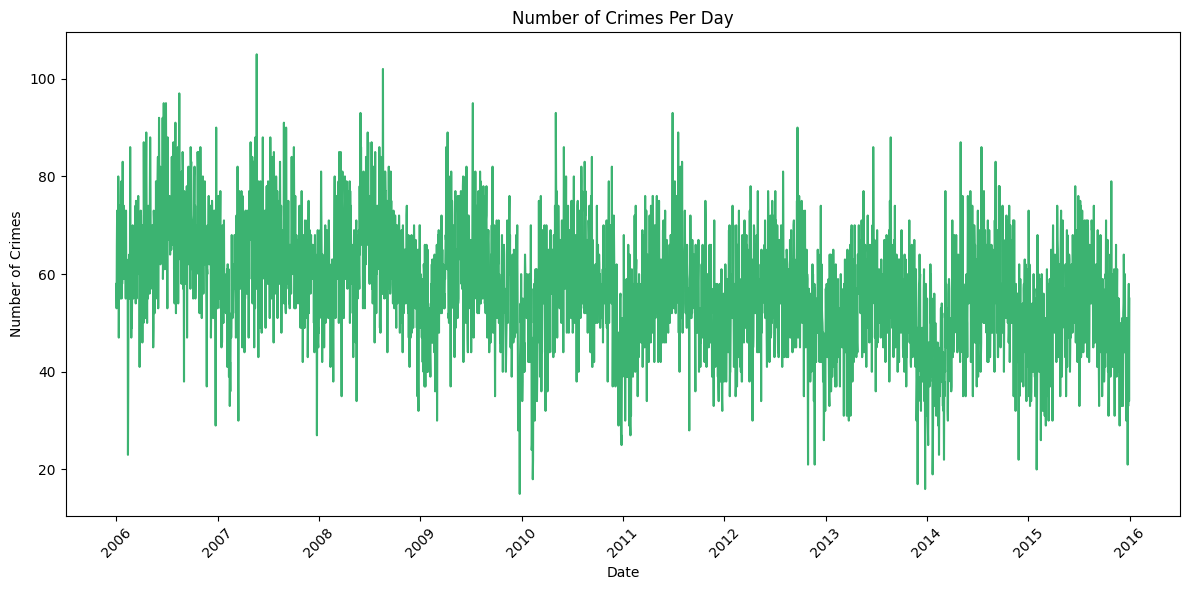

<Figure size 1000x300 with 0 Axes>

In [10]:
crimes_per_day = df.groupby('date').size() # To group the crimes by dates

# Visualize
plt.figure(figsize=(12,6))
plt.plot(crimes_per_day.index, crimes_per_day.values, color='mediumseagreen') # Plot the number of crimes by the dates
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Per Day')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.savefig("Number of Crimes Per Day.jpeg")


- Extract the hour from the 'Dispatch_Date_Time' column to convert it to an integer 
- Visualize the distribution of crimes by hour

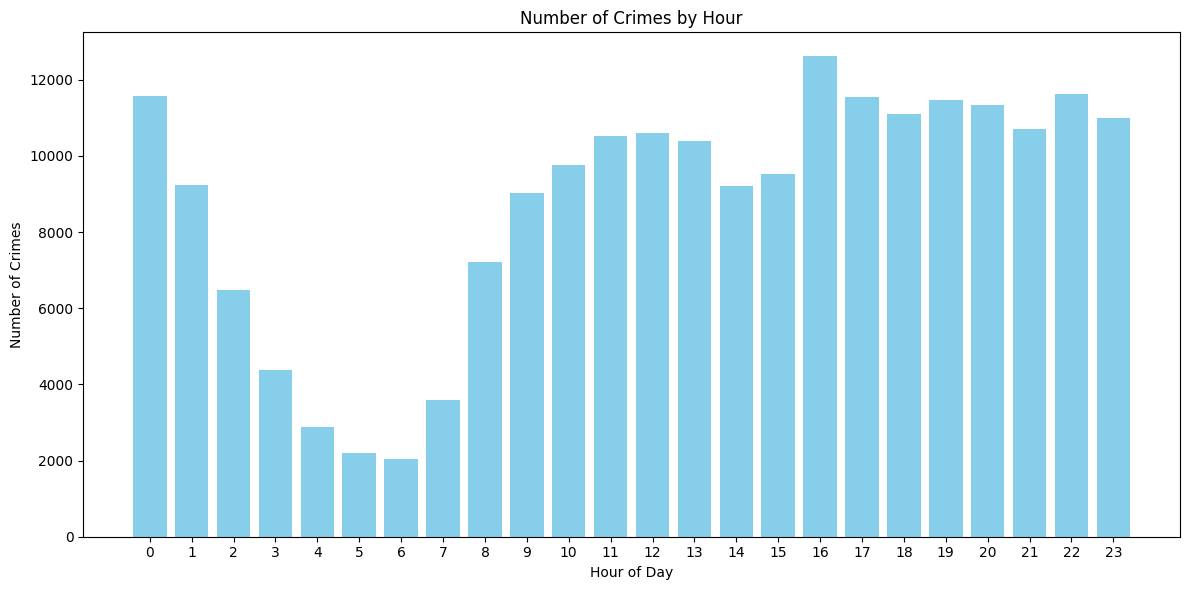

In [11]:
# Extract the hour from the datetime type to form int only as hour
df['hour'] = df['Dispatch_Date_Time'].dt.strftime('%H').astype(int)

hour_counts = df.groupby('hour').size() # To groupby the size of crimes by the hour

# Visuals
plt.figure(figsize=(12,6))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour')
plt.xticks(range(24)) #X axis is between 24 hours or daily
plt.tight_layout()
plt.show()


- Extract the month from the 'Dispatch_Date_Time' column,convert to an int
- Visualize the distribution by month

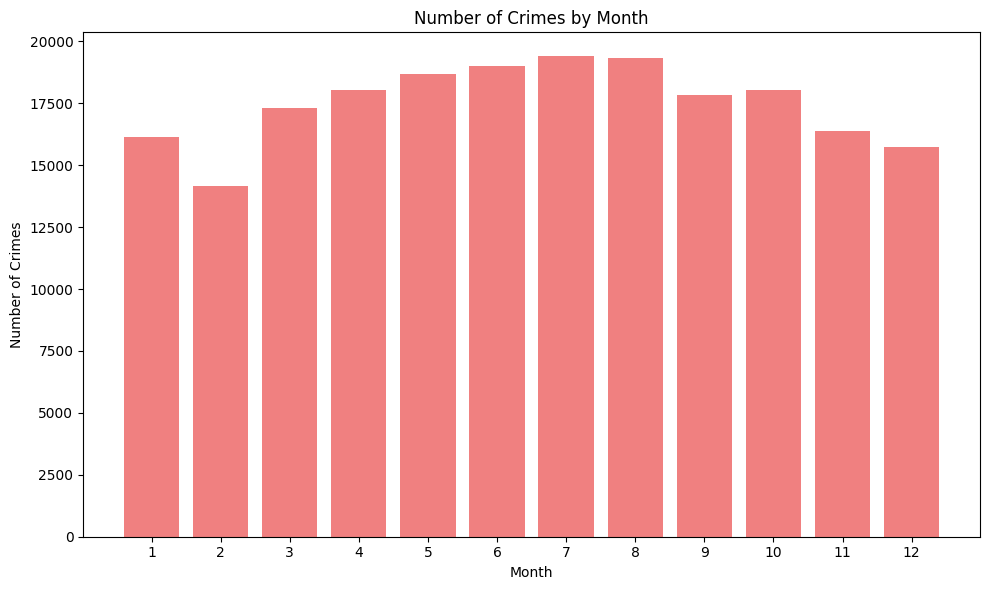

In [12]:
# Extract the months from the datetime and convert it to an int in new column
df['month'] = df['Dispatch_Date_Time'].dt.strftime('%m').astype(int)

month_counts = df.groupby('month').size()

plt.figure(figsize=(10,6))
plt.bar(month_counts.index, month_counts.values, color='lightcoral')
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes by Month")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


- Group by crime category, count occurences, sort in descending order
- Visualize by plotting the top 10 categories

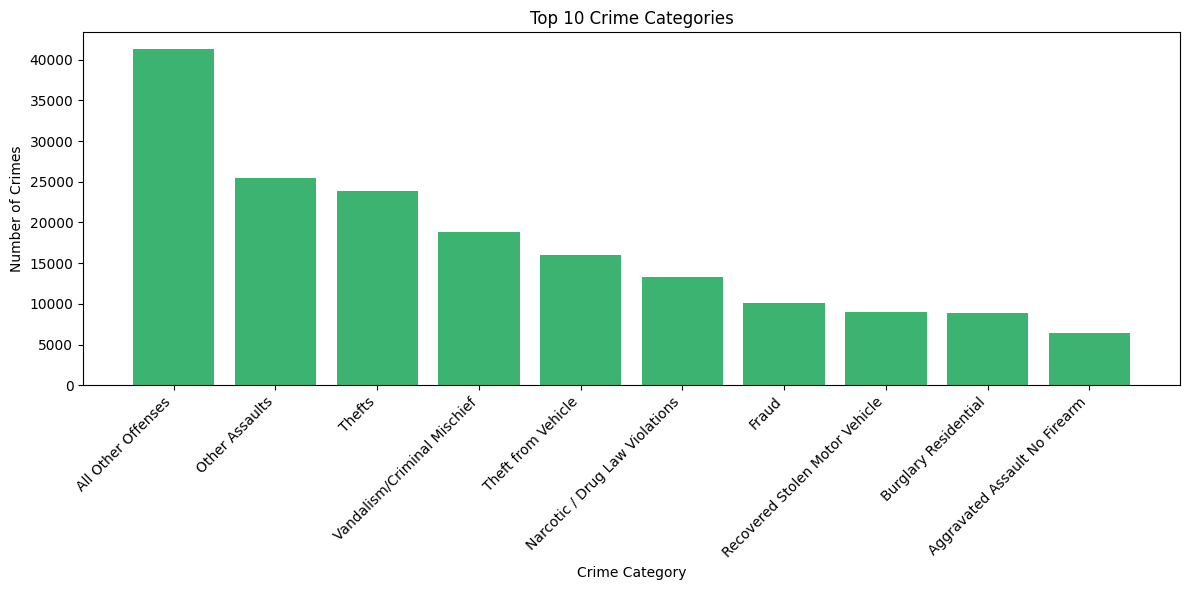

In [13]:
category_counts = df.groupby('Text_General_Code').size().sort_values(ascending=False)

top_category_10 = category_counts.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_category_10.index, top_category_10.values, color='mediumseagreen')
plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes")
plt.title("Top 10 Crime Categories")
plt.xticks(rotation = 45, ha='right') # Xlabels sorted in descending order
plt.tight_layout()
plt.show()

- Group by police headquarters (Dc_Dist), count crimes, sort in descending order 
- Plot the top 10 police headquarters

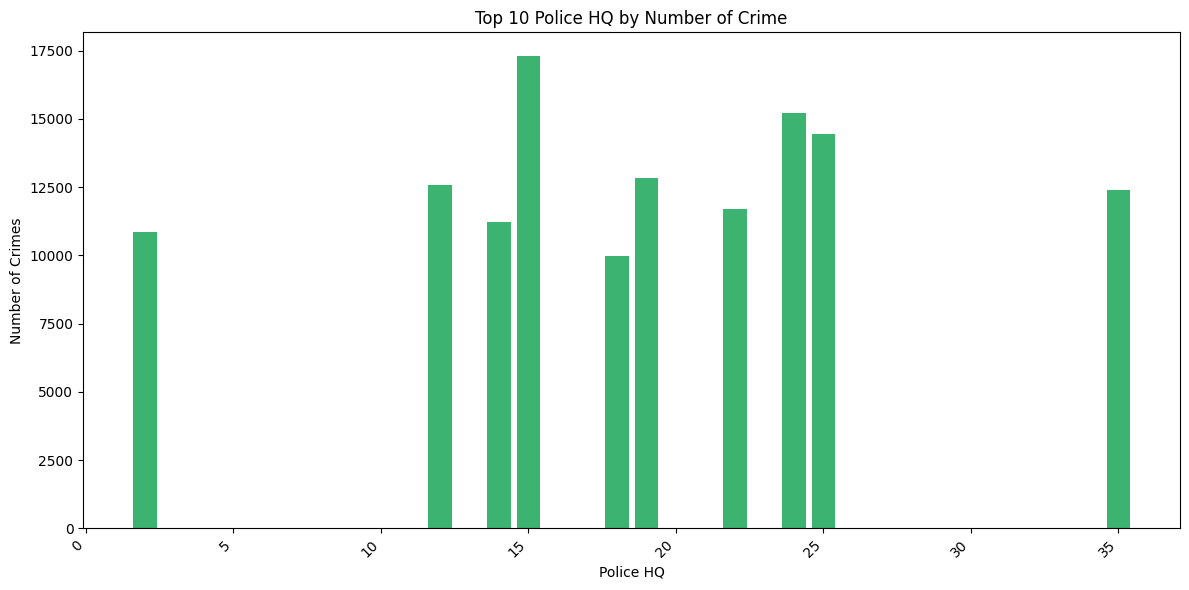

In [14]:
# Group by police HQ
hq_counts = df.groupby('Dc_Dist').size().sort_values(ascending=False)

top_10_police = hq_counts.head(10)
plt.figure(figsize=(12,6))
plt.bar(top_10_police.index, top_10_police.values, color='mediumseagreen')
plt.xlabel("Police HQ")
plt.ylabel("Number of Crimes")
plt.title("Top 10 Police HQ by Number of Crime")
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show()

## 🔦Summary 🔦:

### ℹQ&A ℹ️
* **What is the overall goal of the data analysis task?** To analyze crime data to visualize crime trends over time and across different categories, including identifying peak hours, frequent crime categories, and police districts with high crime activity.


### Data Analysis Key Findings🔎
* **Temporal Patterns:** Crime occurrences fluctuate daily, with specific days exhibiting higher crime rates than others.  Crime patterns also exist across hours and months, with certain hours and months recording higher crime incidents.
* **Crime Hotspots:**  The analysis identified the top 10 crime categories and the top 10 police headquarters with the highest number of reported crimes. This information can be used to focus resources and deploy crime prevention strategies.


### 🔎 Insights or Next Steps 🔦
* **Resource Allocation:** Allocate police resources to the top 10 police headquarters and focus crime prevention efforts on the top 10 crime categories.
* **Further Investigation:** Investigate the underlying reasons for the observed temporal patterns (e.g., daily/weekly cycles, seasonal variations) to develop more effective crime prevention strategies.
